<h2>Lab 3 </h2>
<h3>Part 1: Language Modeling / Regression </h3>
<hr style="border:2px solid blue;">

<h3>Realised by:</h3>
<ul>
    <li><strong style="color:black;">ELMRABET HANAE</strong></li>
</ul>

<h3>Guided by:</h3> 
   <p><strong style="color:blue;">Pr . ELAACHAk LOTFy</strong></p>

<h1 style="color:black">DATASET</h1>
The "answers.csv" dataset from the "short_answer_granding_capstone_project" includes short answer responses from students. It contains 2,443 entries with the following columns:

<li>id: Unique identifier for each response.</li>
<li>answer: Text of the student's response.</li>
<li>question_id: Identifier for the corresponding question.</li>
<li>score: Score assigned to the response.</li>
<li>grader_id: Identifier of the grader.</li>
This dataset is used to analyze grading patterns and develop automated grading systems for short answer questions.

#      Question 

<ul>
    <ol><strong style="color:black;">1. Establish a preprocessing NLP pipeline (Tokenization stemming lemmatization, Stop words, Discretization, etc) of the collected Dataset..</strong></ol>
    <ol><strong style="color:black;">2. Encode your Data vectors By using Word2vec (CBOW, Skip Gram), Bag Of words, TF-IDF.</strong></ol>
    <ol><strong style="color:black;">3. Train your models by using SVM, Naive Bayes, Logistic Regression, Ada Boosting
Algorithms (The embedding will be done by Word2Vec).</strong></ol>
    <ol><strong style="color:black;">4. Evaluate the four languages models by using standards metrics (MSE , RMSE, etc), choose the best model then argument your choice.</strong></ol>
    <ol><strong style="color:black;">5. Interpret the Obtained Results.</strong></ol>
</ul>


In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
from sklearn.model_selection import GridSearchCV
import re
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [341]:
data = pd.read_csv('answers.csv')
data.head(5)

id                                             answer  score  correct
0  1.1  High risk problems are address in the prototyp...    3.5      0.0
1  1.1  To simulate portions of the desired final prod...    5.0      1.0
2  1.1  A prototype program simulates the behaviors of...    4.0      1.0
3  1.1  Defined in the Specification phase a prototype...    5.0      1.0
4  1.1  It is used to let the users have a first idea ...    3.0      0.0

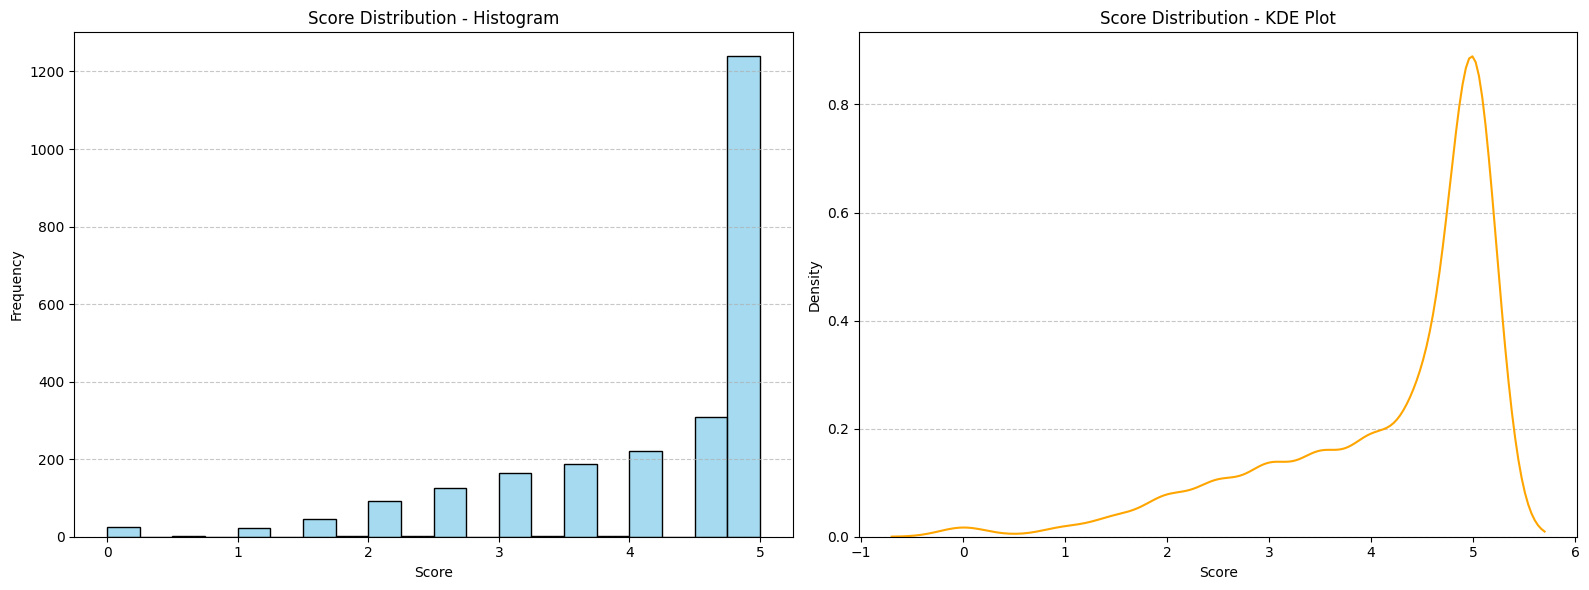

In [342]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data['score'], bins=20, kde=False, color='skyblue', ax=axs[0])
axs[0].set_title('Score Distribution - Histogram')
axs[0].set_xlabel('Score')
axs[0].set_ylabel('Frequency')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.kdeplot(data['score'], color='orange', ax=axs[1])
axs[1].set_title('Score Distribution - KDE Plot')
axs[1].set_xlabel('Score')
axs[1].set_ylabel('Density')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [343]:
all_answers = ' '.join(data['answer'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_answers)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Answers')
plt.axis('off')
plt.show()

In [344]:
def preprocess_text(text):
    
    text = re.sub(r'[^\w\s]', '', text.lower())
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    return lemmatized_tokens

In [345]:
def text_to_vec(text, model):
    vecs = []
    for word in text:
        if word in model.key_to_index:
            vecs.append(model[word])
    if len(vecs) > 0:
        return np.mean(vecs, axis=0)
    else:
        return np.zeros(model.vector_size)

In [346]:
data["answer"] = data["answer"].apply(preprocess_text)

In [347]:
data

id                                             answer  score  correct
0      1.1  [high, risk, problem, address, prototype, prog...    3.5      0.0
1      1.1  [simulate, portion, desired, final, product, q...    5.0      1.0
2      1.1  [prototype, program, simulates, behavior, port...    4.0      1.0
3      1.1  [defined, specification, phase, prototype, sti...    5.0      1.0
4      1.1  [used, let, user, first, idea, completed, prog...    3.0      0.0
...    ...                                                ...    ...      ...
2437  12.1                                           [log, n]    5.0      1.0
2438  12.1                             [minus, 1, divided, 2]    1.5      0.0
2439  12.1                                              [2n1]    2.5      0.0
2440  12.1                   [take, h, step, h, height, tree]    5.0      1.0
2441  12.1  [depends, install, search, tree, whatever, cas...    1.5      0.0

[2442 rows x 4 columns]

In [348]:
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(data['answer'].apply(lambda x: ' '.join(x)))
print(X_bow[0])

  (0, 976)	1
  (0, 1882)	1
  (0, 1656)	1
  (0, 104)	1
  (0, 1692)	2
  (0, 1668)	2
  (0, 1287)	1
  (0, 2140)	1
  (0, 833)	1
  (0, 1305)	1
  (0, 136)	1
  (0, 2283)	1
  (0, 1969)	1
  (0, 391)	1
  (0, 2017)	1
  (0, 1609)	1
  (0, 1673)	1


In [349]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data['answer'].apply(lambda x: ' '.join(x)))
print(X_tfidf[0])

  (0, 1673)	0.2765129460793549
  (0, 1609)	0.2516291538993865
  (0, 2017)	0.21424124767532646
  (0, 391)	0.29106903138037477
  (0, 1969)	0.22674536171941803
  (0, 2283)	0.15209398517951273
  (0, 136)	0.16721543214247367
  (0, 1305)	0.18831681093444316
  (0, 833)	0.29106903138037477
  (0, 2140)	0.2460951871044503
  (0, 1287)	0.17850565575264057
  (0, 1668)	0.275576146361274
  (0, 1692)	0.34684088269120444
  (0, 104)	0.146881991157807
  (0, 1656)	0.16500552079983902
  (0, 1882)	0.29106903138037477
  (0, 976)	0.29106903138037477


In [2]:
model = KeyedVectors.load_word2vec_format(r'GoogleNews-vectors-negative300.bin', binary=True)

In [353]:
df = data.copy()
df['answer'] = [text_to_vec(text, model) for text in df['answer']]
vec_matrix = np.array([vec for vec in df['answer']])
df.drop(['answer'], axis=1, inplace=True)
final_df = df.join(pd.DataFrame(vec_matrix))
final_df.columns = final_df.columns.astype(str)

In [354]:
X = final_df.drop(['id', 'score', ], axis=1)
y = final_df['score']

In [355]:
X

correct         0         1         2         3         4         5  \
0         0.0 -0.011314  0.009007  0.036163  0.094203 -0.086490  0.018722   
1         1.0  0.060389  0.015101  0.001943  0.078427 -0.051615 -0.006441   
2         1.0 -0.026572  0.003052  0.023926  0.027011 -0.124079  0.011813   
3         1.0 -0.008671  0.014805  0.000142  0.075033 -0.145578  0.044373   
4         0.0 -0.004554 -0.003926  0.033550  0.072991 -0.047009  0.024852   
...       ...       ...       ...       ...       ...       ...       ...   
2437      1.0  0.059906 -0.001709 -0.172974  0.051758 -0.112305  0.082764   
2438      0.0  0.057083 -0.097229  0.092163  0.070007 -0.083618  0.013002   
2439      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2440      1.0 -0.039510  0.178182 -0.027710 -0.015666 -0.085327 -0.125814   
2441      0.0  0.078084  0.018366 -0.008784  0.052569 -0.065615  0.034973   

             6         7         8  ...       290       291       292  \
0     0.106346  0.020463  0.070989  ... -0.109144  0.056168 -0.094267   
1     0.117803 -0.036965  0.066339  ... -0.111039  0.037476 -0.037692   
2     0.080247 -0.029785  0.052379  ... -0.120128  0.113636 -0.021476   
3     0.101935 -0.095030  0.071394  ... -0.168329  0.041958 -0.046039   
4     0.105057 -0.020392  0.127749  ... -0.134584  0.128961 -0.055376   
...        ...       ...       ...  ...       ...       ...       ...   
2437  0.064453  0.097168 -0.015137  ...  0.093750  0.042542  0.026489   
2438 -0.010864 -0.219482  0.080505  ... -0.066467  0.048859 -0.047043   
2439  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
2440  0.041423 -0.071615  0.065877  ... -0.049072  0.149902 -0.137634   
2441  0.103816 -0.079417  0.120544  ... -0.033778  0.135666 -0.024923   

           293       294       295       296       297       298       299  
0    -0.002266 -0.000630  0.034838 -0.050432 -0.082519 -0.058517 -0.084094  
1     0.014641 -0.033205  0.092497 -0.027912 -0.017063 -0.050849 -0.066237  
2    -0.043010  0.050251  0.023088  0.028648 -0.092174 -0.106146  0.061167  
3    -0.039089 -0.018669  0.049331 -0.036801 -0.036714 -0.032854  0.002749  
4     0.009431 -0.027363  0.014968  0.045993 -0.082018 -0.065550 -0.084932  
...        ...       ...       ...       ...       ...       ...       ...  
2437  0.014893 -0.046875 -0.259277  0.060059 -0.158569 -0.154785 -0.022278  
2438  0.087646 -0.072632 -0.008606 -0.140869 -0.116821 -0.064392  0.026764  
2439  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2440  0.075846 -0.028071 -0.089600 -0.154867 -0.002360 -0.088175  0.027323  
2441  0.016905  0.022451 -0.023905 -0.034216 -0.109090  0.036997  0.015066  

[2442 rows x 301 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [ ]:
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae}

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("Linear Regression Evaluation:")
print(evaluate_model(y_test, lr_pred))

Linear Regression Evaluation:
{'MSE': 0.267010000486232, 'RMSE': 0.516730104102937, 'MAE': 0.3785642715280089}


In [ ]:
param_grid = {'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],'min_samples_split': [2, 5, 10, 20, 30],'min_samples_leaf': [1, 2, 4, 6, 8, 10]}
dt_model = DecisionTreeRegressor()
grid_search = GridSearchCV(dt_model, param_grid, cv = 10, scoring='neg_mean_squared_error', n_jobs = -1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_dt_model = DecisionTreeRegressor(**best_params)
best_dt_model.fit(X_train, y_train)
best_dt_pred = best_dt_model.predict(X_test)
print("Best Decision Tree Evaluation:")
print(evaluate_model(y_test, best_dt_pred))

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 30}
Best Decision Tree Evaluation:
{'MSE': 0.2921023861729965, 'RMSE': 0.5404649721980107, 'MAE': 0.36539123672201745}


In [ ]:
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'C': [0.1, 1, 10],'gamma': ['scale', 'auto'],'epsilon': [0.1, 0.2, 0.5]}
svr_model = SVR()
grid_search = GridSearchCV(svr_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_svr_model = SVR(**best_params)
best_svr_model.fit(X_train, y_train)
best_svr_pred = best_svr_model.predict(X_test)
print("Best Support Vector Regression (SVR) Evaluation:")
print(evaluate_model(y_test, best_svr_pred))

Best Parameters: {'C': 1, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'poly'}
Best Support Vector Regression (SVR) Evaluation:
{'MSE': 0.2066250216324193, 'RMSE': 0.45456025082756557, 'MAE': 0.3378771237804957}


In [ ]:
mse_lr = mean_squared_error(y_test, lr_pred)
mse_best_dt = mean_squared_error(y_test, best_dt_pred)
mse_best_svr = mean_squared_error(y_test, best_svr_pred)

mae_lr = mean_absolute_error(y_test, lr_pred)
mae_best_dt = mean_absolute_error(y_test, best_dt_pred)
mae_best_svr = mean_absolute_error(y_test, best_svr_pred)

rmse_lr = root_mean_squared_error(y_test, lr_pred)
rmse_best_dt = root_mean_squared_error(y_test, best_dt_pred)
rmse_best_svr = root_mean_squared_error(y_test, best_svr_pred)

error_data = {
    'Model': ['Linear Regression', 'Decision Tree', 'SVM'],
    'MSE': [mse_lr, mse_best_dt, mse_best_svr],
    'RMSE': [rmse_lr, rmse_best_dt, rmse_best_svr],
    'MAE': [mae_lr, mae_best_dt, mae_best_svr]
}
error_df = pd.DataFrame(error_data)
print("Error metrics for each model:")
error_df


Error metrics for each model:


Model       MSE      RMSE       MAE
0  Linear Regression  0.267010  0.516730  0.378564
1      Decision Tree  0.292102  0.540465  0.365391
2                SVM  0.206625  0.454560  0.337877

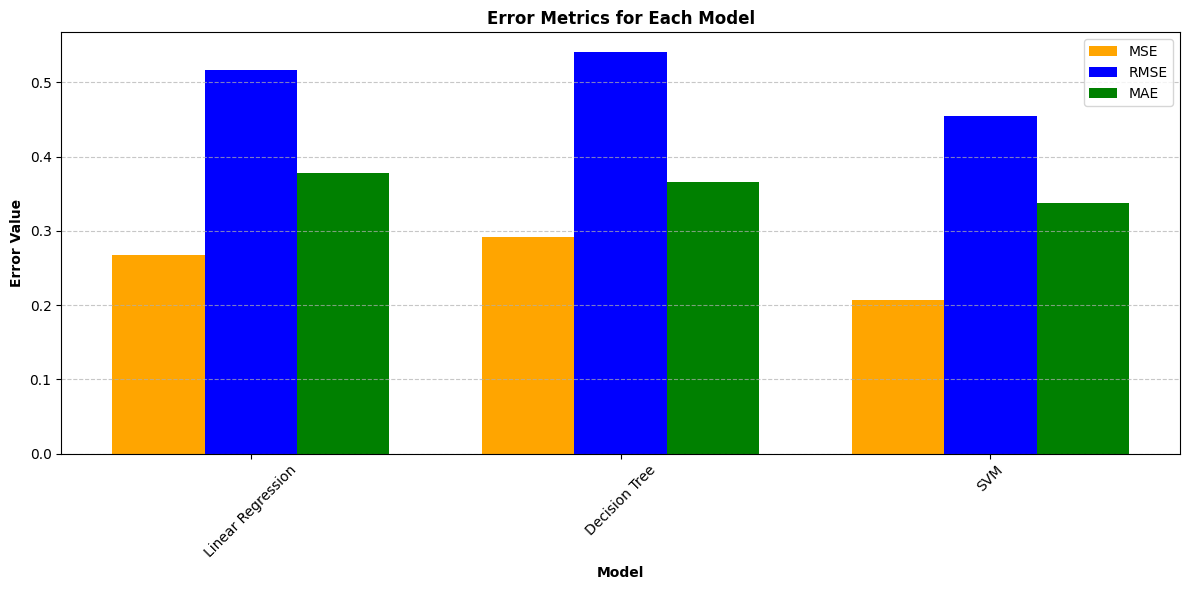

In [ ]:
models = ['Linear Regression', 'Decision Tree', 'SVM']
mse_values = [mse_lr, mse_best_dt, mse_best_svr]
rmse_values = [rmse_lr, rmse_best_dt, rmse_best_svr]
mae_values = [mae_lr, mae_best_dt, mae_best_svr]

bar_width = 0.25

r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(12, 6))
plt.bar(r1, mse_values, color='orange', width=bar_width, label='MSE')
plt.bar(r2, rmse_values, color='blue', width=bar_width, label='RMSE')
plt.bar(r3, mae_values, color='green', width=bar_width, label='MAE')

plt.xlabel('Model', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models, rotation=45)

plt.ylabel('Error Value', fontweight='bold')
plt.title('Error Metrics for Each Model', fontweight='bold')
plt.legend()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



### Interpretation:
The provided error metrics for three models—Linear Regression, Decision Tree, and SVM—are as follows:

<p style="color:blue">Mean Squared Error (MSE): Measures the average squared difference between predicted and actual values. Lower values indicate better performance.</p>

<li>Linear Regression: 0.267</li>
<li>Decision Tree: 0.292</li>
<li>SVM: 0.207 (best performance)</li>

<p style="color:blue">Root Mean Squared Error (RMSE): Square root of MSE, providing error in the same units as the target variable. Lower values are better.</p>

<li>Linear Regression: 0.517</li>
<li>Decision Tree: 0.540</li>
<li>SVM: 0.455 (best performance)</li>

<p style="color:blue">Mean Absolute Error (MAE): Average of the absolute differences between predicted and actual values. Lower values indicate better performance.</p>

<li>Linear Regression: 0.379</li>
<li>Decision Tree: 0.365</li>
<li>SVM: 0.338 (best performance)</li>

<p style="color:blue">Overall, the SVM model performs the best across all three error metrics, indicating it provides the most accurate predictions among the three models.</p>


During the first part of the lab focused on Language Modeling and Regression, the student learned the following key concepts and techniques:

<h2 style="color:blue">NLP Preprocessing Pipeline:</h2>

<li>Tokenization: Breaking down text into individual words or tokens.</li>
<li>Stemming and Lemmatization: Reducing words to their base or root forms.</li>
<li>Stop Words Removal: Eliminating common words that do not contribute to the model's learning.</li>
<li>Discretization: Transforming continuous data into discrete buckets.</li>

<h2 style="color:blue">Data Encoding Techniques:</h2>

<li>Word2Vec (CBOW and Skip Gram): Transforming text data into numerical vectors using context-based methods.</li>
<li>Bag of Words (BoW): Representing text data based on word frequency.</li>
<li>TF-IDF: Capturing the importance of words in the context of the entire dataset.</li>

<h2 style="color:blue">Model Training:</h2>

Using regression algorithms like Support Vector Regression (SVR), Naive Bayes, Linear Regression, and Decision Tree to train models on the processed text data.

<h2 style="color:blue">Model Evaluation:</h2>

Evaluating the performance of trained models using standard metrics such as Mean Squared Error (MSE) and Root Mean Squared Error (RMSE).
Choosing the best model based on these evaluation metrics and providing a rationale for the choice.

<h2 style="color:blue">Results Interpretation:</h2>

Analyzing and interpreting the results obtained from the model evaluations to understand the effectiveness of different language modeling techniques.